In [12]:
import tensorflow as tf
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [13]:
img_array = cv2.imread("src/emot/Training/0/Training_4309137.jpg")

In [14]:
img_array.shape #rgb

(48, 48, 3)

In [15]:
print(img_array)

[[[  1   1   1]
  [ 30  30  30]
  [ 98  98  98]
  ...
  [ 36  36  36]
  [ 34  34  34]
  [ 31  31  31]]

 [[  0   0   0]
  [ 26  26  26]
  [ 93  93  93]
  ...
  [ 34  34  34]
  [ 35  35  35]
  [ 37  37  37]]

 [[  0   0   0]
  [ 22  22  22]
  [ 90  90  90]
  ...
  [ 34  34  34]
  [ 40  40  40]
  [ 31  31  31]]

 ...

 [[ 31  31  31]
  [ 15  15  15]
  [ 26  26  26]
  ...
  [213 213 213]
  [252 252 252]
  [235 235 235]]

 [[131 131 131]
  [204 204 204]
  [ 52  52  52]
  ...
  [255 255 255]
  [235 235 235]
  [211 211 211]]

 [[215 215 215]
  [248 248 248]
  [ 60  60  60]
  ...
  [181 181 181]
  [ 93  93  93]
  [ 30  30  30]]]


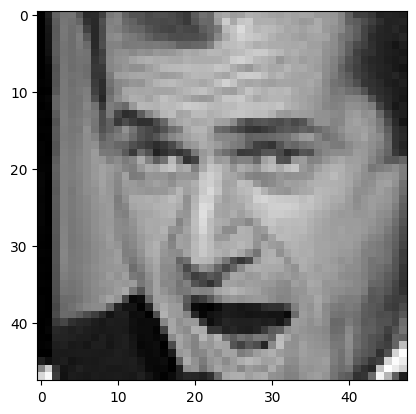

In [16]:
plt.imshow(img_array)

In [17]:
DataDirectory = "src/emot/Training/" ##training dataset

In [18]:
Classes = ["0", "1", "2", "3", "4", "5", "6"] #list of all the classes => exact name of your folders

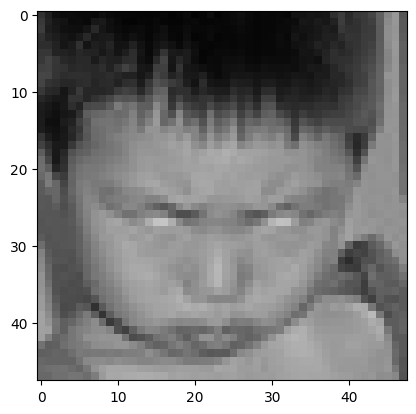

In [19]:
for category in Classes:
    path = os.path.join(DataDirectory, category) ##//
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        #backtorgb = cv2.cvtCOLOR(img_array, cv2.COLOR_GRAY2RGB)
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break


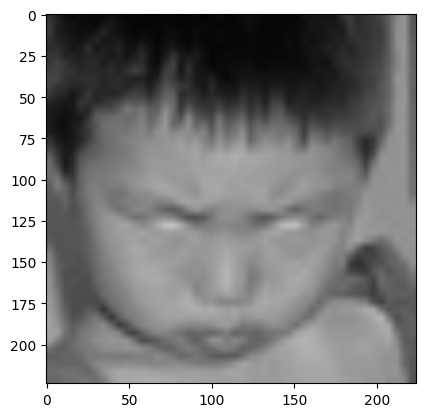

In [20]:
img_size =  224 ##Imagenet => 224 x 224
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [21]:
new_array.shape

(224, 224, 3)

###read all the image and convert in them to array


In [22]:
training_Data = [] ##data array

def create_training_Data():
    for category in Classes:
        path =os.path.join(DataDirectory, category)
        class_num =Classes.index(category) ## 0 1, ##label
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array =cv2.resize(img_array, (img_size, img_size))
                training_Data.append([new_array, class_num])
            except Exception as e:
                pass

In [23]:
create_training_Data()

In [24]:
print(len(training_Data))

7036


In [25]:
temp = np.array(training_Data)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17584\2755283514.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  temp = np.array(training_Data)


In [26]:
temp.shape

(7036, 2)

### We are just using training and deploying for real time webcam demo

In [27]:
import random

random.shuffle(training_Data)

In [28]:
x = [] ##data/feature
y = [] ##label

for features, label in training_Data:
    x.append(features)
    y.append(label)

x = np.array(x).reshape(-1, img_size, img_size, 3) ##converting it to 4 dimension

In [29]:
x.shape

(7036, 224, 224, 3)

In [30]:
#normalize the data
x=x/255.0; ##we are normalizing it because my data contain gray scale images

In [31]:
type(y)

list

In [32]:
y[0]  

3

In [33]:
Y = np.array(y)

In [34]:
Y.shape

(7036,)

### Deep learning model for training -Transfer Learning

In [35]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [36]:
# MobileNetV2 is very similar to the original MobileNet, except that it uses inverted residual blocks with bottlenecking features.
model = tf.keras.applications.MobileNetV2() ##Pre-trained model

In [37]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

### Transsfer Learning - Tuning, Weights will start from last check point

In [38]:
base_input = model.layers[0].input ##input

In [39]:
print(base_input)

KerasTensor(type_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")


In [40]:
base_output = model.layers[-2].output

In [41]:
print(base_output)

KerasTensor(type_spec=TensorSpec(shape=(None, 1280), dtype=tf.float32, name=None), name='global_average_pooling2d/Mean:0', description="created by layer 'global_average_pooling2d'")


In [42]:
final_output = layers.Dense(128)(base_output) ##adding new layer, after the output of global pooling layer
final_output = layers.Activation('relu')(final_output) ##activation function
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation = 'softmax')(final_output) ##my classes are 7, classification layer

In [43]:
final_output ##output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [44]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [45]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [46]:
new_model.compile(loss="sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [47]:
#new_model.fit(x,Y, epochs =20)

In [ ]:
#new_model.save('mod1.h5')

In [49]:
new_model = tf.keras.models.load_model('mod2.h5')

In [50]:
frame = cv2.imread("surprised.jpg")

In [51]:
frame.shape

(279, 465, 3)

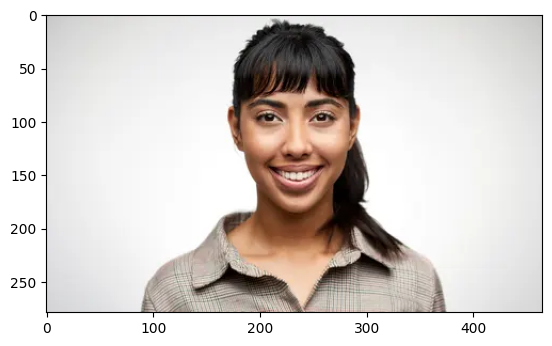

In [52]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [53]:
#we need face detection algortihm( gray image)
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [54]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [55]:
gray.shape

(279, 465)

In [56]:
faces = faceCascade.detectMultiScale(gray, 1.1, 4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame,(x,y), (x+w, y+h), (255,0,0), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face not Detected")
    else:
        for (ex, ey,ew, eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex:ex + ew]

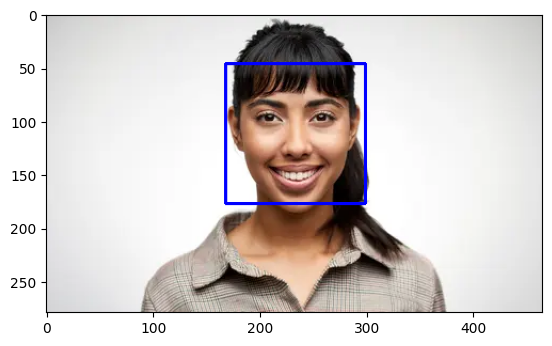

In [57]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

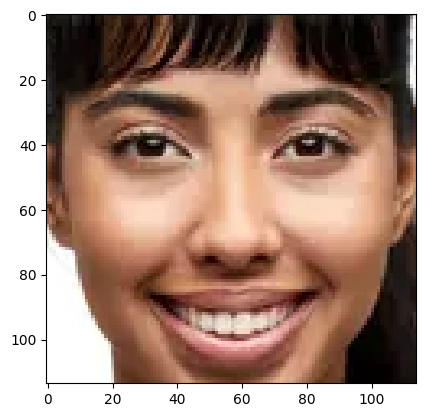

In [58]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [59]:
final_image = cv2.resize(face_roi, (224,224)) ##
final_image = np.expand_dims(final_image,axis = 0) ##need fourth dimension
final_image = final_image/255.0 ## normalizing

In [60]:
Predictions = new_model.predict(final_image)

1/1 [==============================] - 1s 1s/step


In [61]:
Predictions[0]

array([3.1183720e-01, 1.1257210e-04, 6.0301092e-03, 1.2257237e-01,
       2.5073930e-05, 5.9738686e-06, 5.5941665e-01], dtype=float32)

In [62]:
np.argmax(Predictions)

6